<a href="https://colab.research.google.com/github/financieras/AdventOfCode2021/blob/master/perceptron_or.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptrón OR
Usando un perceptrón simple realizaremos la modelización de una puerta lógica OR.

## Pesos y bias aleatorios
Al ejecutar el siguiente código las Salidas obtenidas pueden variar al cambiar aleatoriamene los pesos y el bias (sesgo) que se utilizan.

Para simular una puerta lógica OR la salida esperada $y$ debería venir dada por esta **tabla de verdad**:

| $x_1$ | $x_2$ | $y$ |
|----|----|----|
| 0  |  0 |  0 |
| 0  |  1 |  1 |
| 1  |  0 |  1 |
| 1  |  1 |  1 |


In [47]:
import numpy as np

# Definimos la función de activación escalón
def step_function(x):
  return 1 if x >= 0 else 0

# Inicializamos los pesos y el bias aleatoriamente
def initialize_parameters():
  weights = np.random.uniform(-1, 1, size=2)  # Dos pesos para las dos entradas
  bias = np.random.uniform(-1, 1, size=1)     # Pesos entre -1 y 1
  return weights, bias

# Calculamos la salida del perceptrón
def perceptron(x, weights, bias):
  # Suma ponderada
  z = np.dot(x, weights) + bias
  # Aplicamos la función de activación
  y = step_function(z)
  return y

# Datos de entrenamiento (tabla de verdad de la puerta OR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Inicializamos los parámetros
weights, bias = initialize_parameters()

# Entrenamiento (en este caso, simplemente verificamos la salida)
for i in range(len(X)):
  x = X[i]
  y_pred = perceptron(x, weights, bias)
  print(f"Entrada: {x}, Salida esperada: {y[i]}, Salida obtenida: {y_pred}")

Entrada: [0 0], Salida esperada: 0, Salida obtenida: 0
Entrada: [0 1], Salida esperada: 1, Salida obtenida: 1
Entrada: [1 0], Salida esperada: 1, Salida obtenida: 0
Entrada: [1 1], Salida esperada: 1, Salida obtenida: 1


## Prueba y error
Hemos introducido un bucle `while` para buscar el caso en el que los pesos y el bias nos proporcionan el resultado esperado de una puerta lógica OR.

Lo que hace el bucle `while` es ir probando valores aleatorios hasta encontrar unos pesos y bias que logran obtener la tabla de verdad que estamos buscando. Aunque no son los únicos valores de pesos y bias que lo logran, hay muchos otros valores de pesos y bias que se pueden llegar a obtener aleatoriamente y que logran esta misma tabla de verdad.

Lo que nos gustaría en próximos códigos es lograr un mecanismo de aprendizaje automático que logre estos pesos y bias exitosos de una forma dirigida y no simplemente probando por azar.

In [43]:
import numpy as np

# Definimos la función de activación escalón
def step_function(x):
  return 1 if x >= 0 else 0

# Inicializamos los pesos y el bias aleatoriamente
def initialize_parameters():
  weights = np.random.uniform(-1, 1, size=2)  # Dos pesos para las dos entradas
  bias = np.random.uniform(-1, 1, size=1)     # Pesos entre -1 y 1
  return weights, bias

# Calculamos la salida del perceptrón
def perceptron(x, weights, bias):
  # Suma ponderada
  z = np.dot(x, weights) + bias
  # Aplicamos la función de activación
  y = step_function(z)
  return y

# Datos de entrenamiento (tabla de verdad de la puerta OR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

while True:
    # Inicializamos los parámetros
    weights, bias = initialize_parameters()
    if  perceptron([0,0], weights, bias) == 0 and \
        perceptron([0,1], weights, bias) == 1 and \
        perceptron([1,0], weights, bias) == 1 and \
        perceptron([1,1], weights, bias) == 1:
        print("weights:", np.around(weights, 2), "bias:", np.round(bias, 2))
        break

# Entrenamiento (en este caso, simplemente verificamos la salida)
for i in range(len(X)):
  x = X[i]
  y_pred = perceptron(x, weights, bias)
  print(f"Entrada: {x}, Salida esperada: {y[i]}, Salida obtenida: {y_pred}")

weights: [0.64 0.76] bias: [-0.13]
Entrada: [0 0], Salida esperada: 0, Salida obtenida: 0
Entrada: [0 1], Salida esperada: 1, Salida obtenida: 1
Entrada: [1 0], Salida esperada: 1, Salida obtenida: 1
Entrada: [1 1], Salida esperada: 1, Salida obtenida: 1


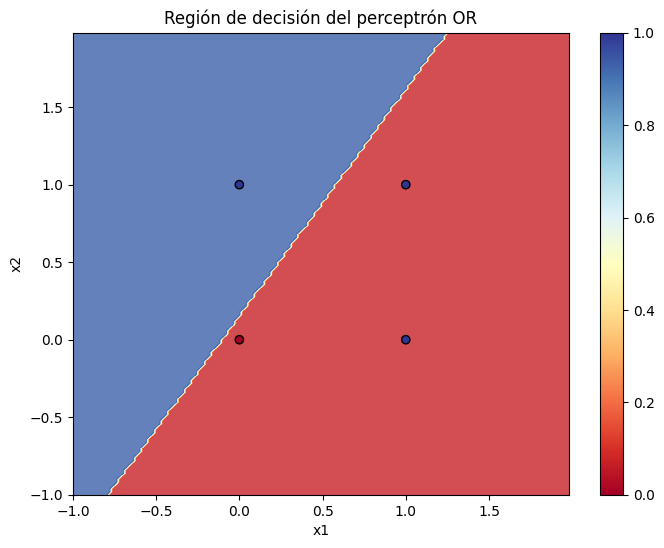

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función de activación escalón
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Inicializamos los pesos y el bias aleatoriamente
def initialize_parameters():
    weights = np.random.uniform(-1, 1, size=2)  # Dos pesos para las dos entradas
    bias = np.random.uniform(-1, 1, size=1)
    return weights, bias

# Calculamos la salida del perceptrón
def perceptron(X, weights, bias):
    z = np.dot(X, weights) + bias
    return step_function(z)

# Datos de entrenamiento (tabla de verdad de la puerta OR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Inicializamos los parámetros
weights, bias = initialize_parameters()

# Generar una malla de puntos
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02  # Tamaño de la malla
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir las clases para cada punto de la malla
X_grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron(X_grid, weights, bias)
Z = Z.reshape(xx.shape)

# Graficar la región de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Región de decisión del perceptrón OR')
plt.colorbar()
plt.show()